# About Dataset 

### Context
This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources <br>

### Sources: <br>

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.<br>
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 <br>
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037 <br>

### Content <br>
This data set consists of three types of entities: <br> (a) the specification of an auto in terms of various characteristics, <br> (b) its assigned insurance risk rating, <br> (c) its normalized losses in use as compared to other cars. <br> <br> The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. <br>

<br>
The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year. <br>

Note: Several of the attributes in the database could be used as a "class" attribute.

# Import Libraries

In [122]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

# Load Data

In [123]:
def load_data(file_path):
  auto_data=pd.read_csv(file_path)
  # shape=auto_data.shape
  return auto_data

In [124]:
csv_file_path= '/content/Automobile_data.csv'
csv_preprocess=load_data(csv_file_path)

In [125]:
csv_preprocess

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [126]:
csv_preprocess.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### Unique Value 

In [127]:
print(csv_preprocess['symboling'].unique())
print(csv_preprocess['normalized-losses'].unique())
print(csv_preprocess['make'].unique())
print(csv_preprocess['fuel-type'].unique())
print(csv_preprocess['aspiration'].unique())
print(csv_preprocess['num-of-doors'].unique())
print(csv_preprocess['body-style'].unique())
print(csv_preprocess['drive-wheels'].unique())
print(csv_preprocess['engine-location'].unique())
print(csv_preprocess['wheel-base'].unique())
print(csv_preprocess['length'].unique())
print(csv_preprocess['width'].unique())
print(csv_preprocess['height'].unique())
print(csv_preprocess['curb-weight'].unique())
print(csv_preprocess['engine-type'].unique())
print(csv_preprocess['num-of-cylinders'].unique())
print(csv_preprocess['engine-size'].unique())
print(csv_preprocess['fuel-system'].unique())
print(csv_preprocess['bore'].unique())
print(csv_preprocess['stroke'].unique())
print(csv_preprocess['compression-ratio'].unique())
print(csv_preprocess['horsepower'].unique())
print(csv_preprocess['peak-rpm'].unique())
print(csv_preprocess['city-mpg'].unique())
print(csv_preprocess['highway-mpg'].unique())
print(csv_preprocess['price'].unique())

[ 3  1  2  0 -1 -2]
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four' '?']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 

### Rename of Features

In [128]:
csv_preprocess.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [129]:
csv_preprocess.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [130]:
# renames of dataset
csv_preprocess=csv_preprocess.rename(columns={'normalized-losses' : 'normalized_losses' , 'fuel-type' : 'fuel_type' , 'num-of-doors' : 'num_of_doors' , 'body-style' : 'body_style' , 'drive-wheels' : 'drive_wheels' , 'engine-location' : 'engine_location' , 'wheel-base' : 'wheel_base' , 'curb-weight' : 'curb_weight' , 'engine-type' : 'engine_type' , 'num-of-cylinders' : 'num-of-cylinders' , 'engine-size' : 'engine_size'  , 'fuel-system' : 'fuel_system' , 'compression-ratio' : 'compression_ratio' , 'peak-rpm' : 'peak_rpm'  , 'city-mpg' : 'city_mpg' , 'highway-mpg' : 'highway_mpg'})

## Label Encoding

In [131]:
csv_preprocess['make']=le.fit_transform(csv_preprocess['make'])
csv_preprocess['fuel_type']=le.fit_transform(csv_preprocess['fuel_type'])
csv_preprocess['aspiration']=le.fit_transform(csv_preprocess['aspiration'])
csv_preprocess['body_style']=le.fit_transform(csv_preprocess['body_style'])
csv_preprocess['drive_wheels']=le.fit_transform(csv_preprocess['drive_wheels'])
csv_preprocess['engine_type']=le.fit_transform(csv_preprocess['engine_type'])
csv_preprocess['num-of-cylinders']=le.fit_transform(csv_preprocess['num-of-cylinders'])
csv_preprocess['engine_location']=le.fit_transform(csv_preprocess['engine_location'])
csv_preprocess['fuel_system']=le.fit_transform(csv_preprocess['fuel_system'])
csv_preprocess['num_of_doors']=le.fit_transform(csv_preprocess['num_of_doors'])

In [132]:
csv_preprocess.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num-of-cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [133]:
def preprocess_data(data):
  data['normalized_losses']=data['normalized_losses'].replace("?" , np.nan)
  data['num_of_doors']=data['num_of_doors'].replace("?" , np.nan)
  data['price']=data['price'].replace("?" , np.nan)
  data['bore']=data['bore'].replace("?" , np.nan)
  data['stroke']=data['stroke'].replace("?" , np.nan)
  data['horsepower']=data['horsepower'].replace("?" , np.nan)
  data['peak_rpm']=data['peak_rpm'].replace("?" , np.nan)
  data=data.fillna(0)
  data['price']=data['price'].astype(int)
  data['peak_rpm']=data['peak_rpm'].astype(int)
  data['horsepower']=data['horsepower'].astype(int)
  data['stroke']=data['stroke'].astype(float)
  data['bore']=data['bore'].astype(float)
  data['normalized_losses']=data['normalized_losses'].astype(float)
  return data


preprocess_data=preprocess_data(csv_preprocess)
print(preprocess_data)

     symboling  normalized_losses  make  fuel_type  aspiration  num_of_doors  \
0            3                0.0     0          1           0             2   
1            3                0.0     0          1           0             2   
2            1                0.0     0          1           0             2   
3            2              164.0     1          1           0             1   
4            2              164.0     1          1           0             1   
..         ...                ...   ...        ...         ...           ...   
200         -1               95.0    21          1           0             1   
201         -1               95.0    21          1           1             1   
202         -1               95.0    21          1           0             1   
203         -1               95.0    21          0           1             1   
204         -1               95.0    21          1           1             1   

     body_style  drive_wheels  engine_l

In [134]:
print(preprocess_data['symboling'].unique())
print(preprocess_data['normalized_losses'].unique())
print(preprocess_data['make'].unique())
print(preprocess_data['fuel_type'].unique())
print(preprocess_data['aspiration'].unique())
print(preprocess_data['num_of_doors'].unique())
print(preprocess_data['body_style'].unique())
print(preprocess_data['drive_wheels'].unique())
print(preprocess_data['engine_location'].unique())
print(preprocess_data['wheel_base'].unique())
print(preprocess_data['length'].unique())
print(preprocess_data['width'].unique())
print(preprocess_data['height'].unique())
print(preprocess_data['curb_weight'].unique())
print(preprocess_data['engine_type'].unique())
print(preprocess_data['num-of-cylinders'].unique())
print(preprocess_data['engine_size'].unique())
print(preprocess_data['fuel_system'].unique())
print(preprocess_data['bore'].unique())
print(preprocess_data['stroke'].unique())
print(preprocess_data['compression_ratio'].unique())
print(preprocess_data['horsepower'].unique())
print(preprocess_data['peak_rpm'].unique())
print(preprocess_data['city_mpg'].unique())
print(preprocess_data['highway_mpg'].unique())
print(preprocess_data['price'].unique())

[ 3  1  2  0 -1 -2]
[  0. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[1 0]
[0 1]
[2 1 0]
[0 2 3 4 1]
[2 1 0]
[0 1]
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]
[168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173

In [135]:
# check how many rows are present in the dataset
preprocess_data.query('normalized_losses.isna()')

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [136]:
preprocess_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   make               205 non-null    int64  
 3   fuel_type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num_of_doors       205 non-null    int64  
 6   body_style         205 non-null    int64  
 7   drive_wheels       205 non-null    int64  
 8   engine_location    205 non-null    int64  
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine_size        205 non

In [137]:
preprocess_data.memory_usage(deep=True)

Index                 128
symboling            1640
normalized_losses    1640
make                 1640
fuel_type            1640
aspiration           1640
num_of_doors         1640
body_style           1640
drive_wheels         1640
engine_location      1640
wheel_base           1640
length               1640
width                1640
height               1640
curb_weight          1640
engine_type          1640
num-of-cylinders     1640
engine_size          1640
fuel_system          1640
bore                 1640
stroke               1640
compression_ratio    1640
horsepower           1640
peak_rpm             1640
city_mpg             1640
highway_mpg          1640
price                1640
dtype: int64

In [138]:
preprocess_data.describe()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,97.600000,12.195122,0.902439,0.180488,1.424390,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.264780,3.191902,10.142537,103.239024,5075.365854,25.219512,30.751220,12949.429268
std,1.245307,58.282073,6.274831,0.297446,0.385535,0.514867,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.535268,0.549625,3.972040,40.832470,694.650771,6.542142,6.886443,8079.043284
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,13.000000,16.000000,0.000000
25%,0.000000,77.000000,8.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.130000,3.100000,8.600000,70.000000,4800.000000,19.000000,25.000000,7689.000000
50%,1.000000,103.000000,12.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10198.000000
75%,2.000000,137.000000,19.000000,1.000000,0.000000,2.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,21.000000,1.000000,1.000000,2.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [139]:
preprocess_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,0.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0.0,0,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,1,1,0,1,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,1,1,0,1,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450


# Visulization

In [140]:
preprocess_data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num-of-cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

# Label Encoding 

### make

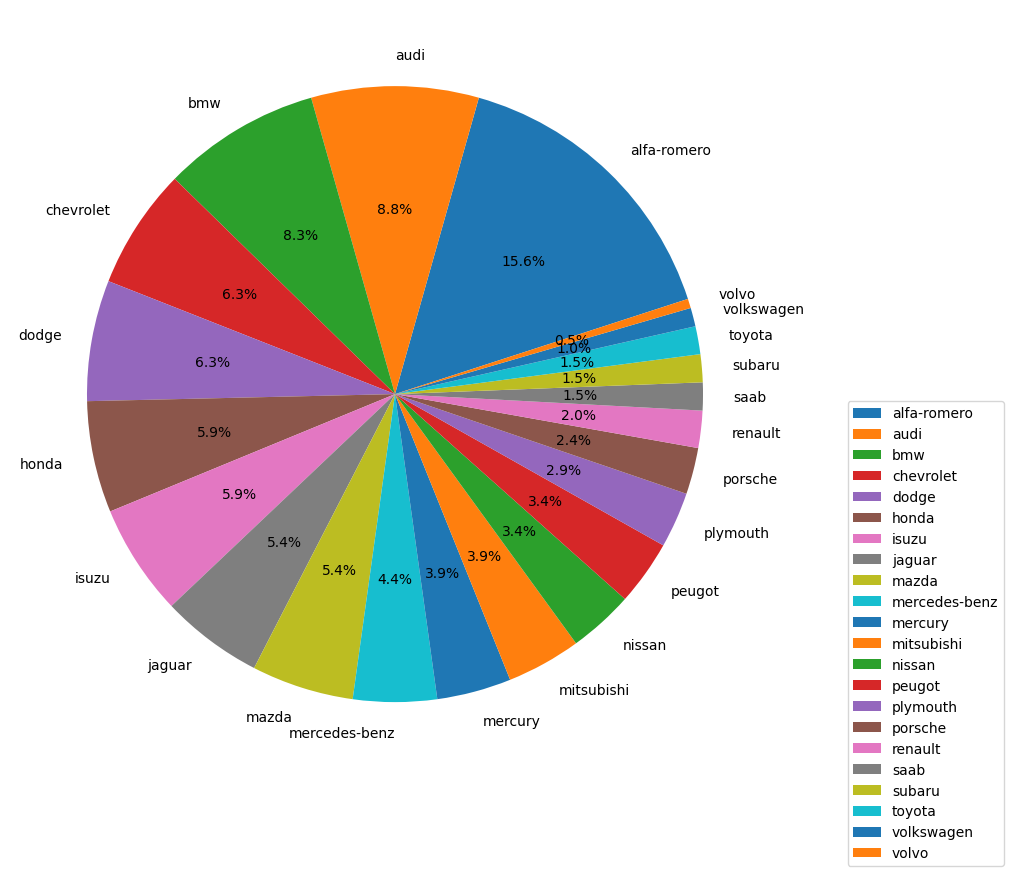

In [141]:
labels=['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
make_percentage_unique_make = preprocess_data['make'].value_counts(normalize=True) * 100
plt.figure(figsize=(18,10))
plt.pie(x=make_percentage_unique_make , labels=labels , startangle=18 , autopct='%1.1f%%' )
plt.legend(loc='upper right' , bbox_to_anchor=[1.3, 0.5])
plt.savefig('make.png')

## Fuel_Type

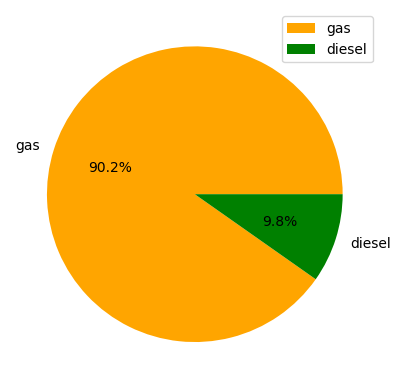

In [142]:
fuel_type = ['gas', 'diesel']
make_percentage_unique_fuel_type = preprocess_data['fuel_type'].value_counts(normalize=True) * 100

plt.pie(x=make_percentage_unique_fuel_type, labels=fuel_type, autopct='%1.1f%%', colors=['orange', 'green'])
plt.legend()
plt.savefig('fuel_type.png')
plt.show()


## Num-of-Doors

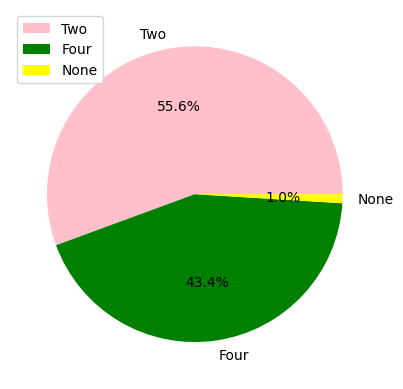

In [143]:
num_of_door = ['Two', 'Four' , 'None']
make_percentage_unique_num_of_doors = preprocess_data['num_of_doors'].value_counts(normalize=True) * 100

plt.pie(x=make_percentage_unique_num_of_doors, labels=num_of_door, autopct='%1.1f%%', colors=['pink', 'green' , 'yellow'])
plt.legend()
plt.savefig('num_of_door.png')
plt.show()

# Body Style

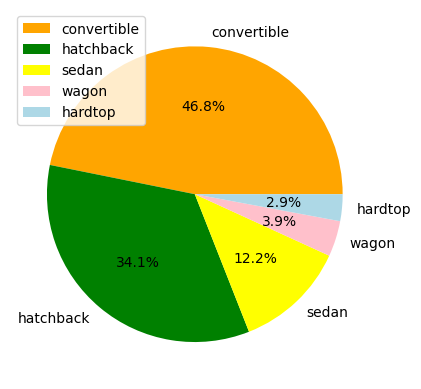

In [144]:
body_style = ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
make_percentage_unique_body_style = preprocess_data['body_style'].value_counts(normalize=True) * 100

plt.pie(x=make_percentage_unique_body_style, labels=body_style, autopct='%1.1f%%', colors=['orange', 'green' , 'yellow' , 'pink' , 'lightblue'])
plt.legend()
plt.savefig('body_style.png')
plt.show()

# Numeric Features 

In [145]:
preprocess_data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num-of-cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

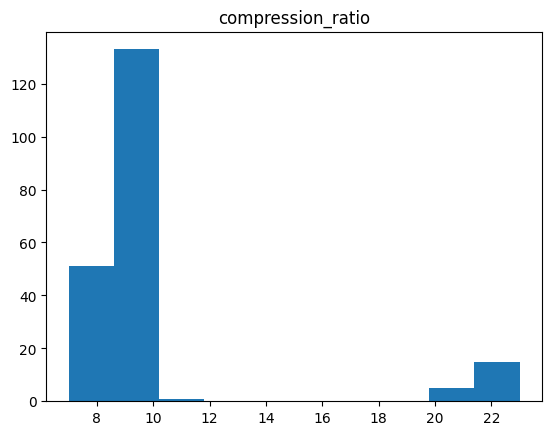

In [146]:
plt.hist(preprocess_data['compression_ratio'])
plt.title('compression_ratio')
plt.savefig('compression_ratio.png')

# Heatmap

### Unique Features

In [147]:
print(preprocess_data['symboling'].unique())
print(preprocess_data['normalized_losses'].unique())
print(preprocess_data['make'].unique())
print(preprocess_data['fuel_type'].unique())
print(preprocess_data['aspiration'].unique())
print(preprocess_data['num_of_doors'].unique())
print(preprocess_data['body_style'].unique())
print(preprocess_data['drive_wheels'].unique())
print(preprocess_data['engine_location'].unique())
print(preprocess_data['wheel_base'].unique())
print(preprocess_data['length'].unique())
print(preprocess_data['width'].unique())
print(preprocess_data['height'].unique())
print(preprocess_data['curb_weight'].unique())
print(preprocess_data['engine_type'].unique())
print(preprocess_data['num-of-cylinders'].unique())
print(preprocess_data['engine_size'].unique())
print(preprocess_data['fuel_system'].unique())
print(preprocess_data['bore'].unique())
print(preprocess_data['stroke'].unique())
print(preprocess_data['compression_ratio'].unique())
print(preprocess_data['horsepower'].unique())
print(preprocess_data['peak_rpm'].unique())
print(preprocess_data['city_mpg'].unique())
print(preprocess_data['highway_mpg'].unique())
print(preprocess_data['price'].unique())

[ 3  1  2  0 -1 -2]
[  0. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[1 0]
[0 1]
[2 1 0]
[0 2 3 4 1]
[2 1 0]
[0 1]
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]
[168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173

In [148]:
preprocess_data.corr(method='spearman').shape

(26, 26)

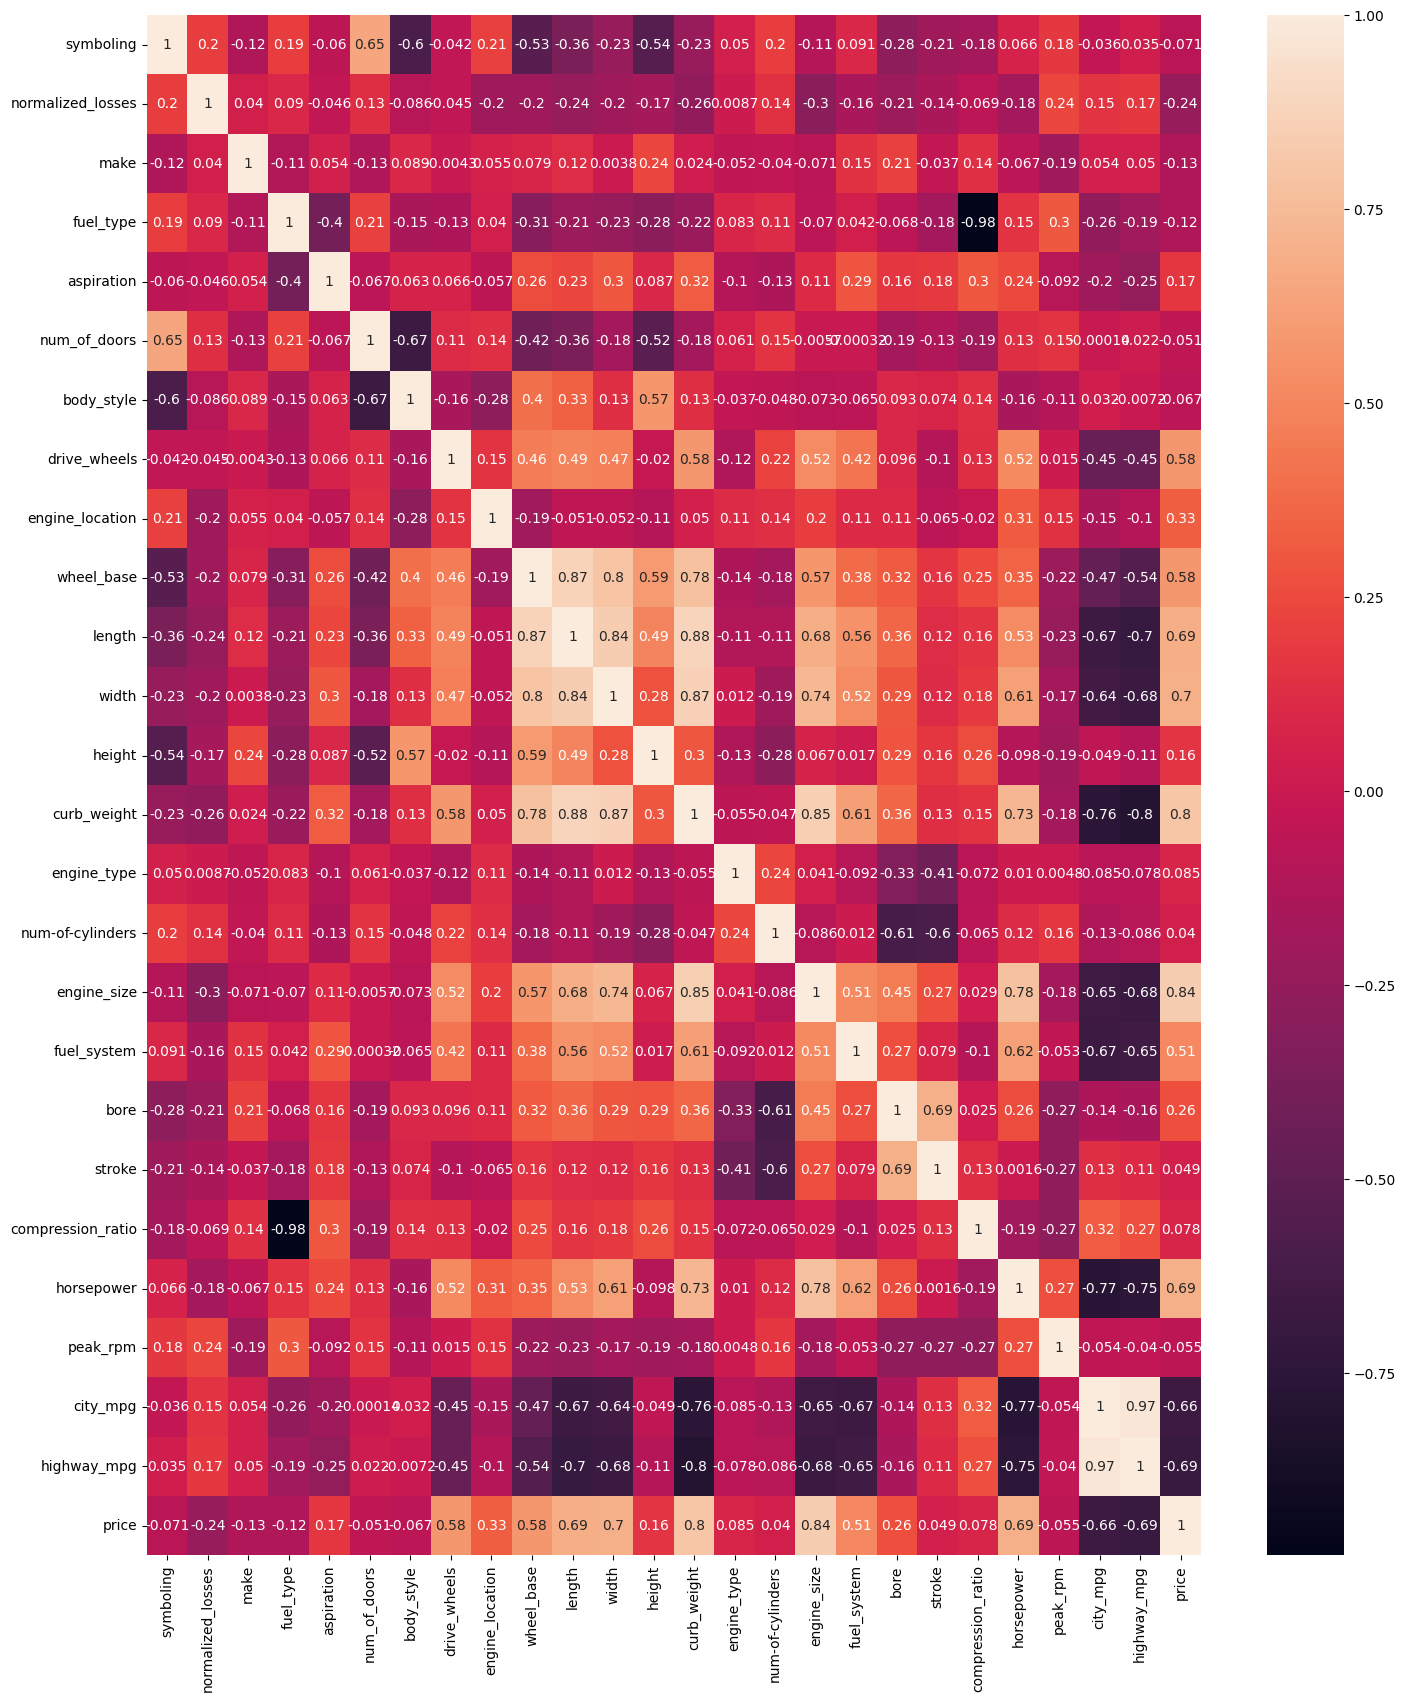

In [149]:
import seaborn as sns 
plt.figure(figsize=(17,20))
sns.heatmap(preprocess_data.corr() , annot=True)
plt.savefig('heat_map.png')

In [150]:
# identify the training and target features
features=preprocess_data.iloc[:,:-1]
Target=preprocess_data.iloc[:,-1]

In [151]:
# Drop the Features
features=features.drop(columns=['highway_mpg' , 'city_mpg' , 'engine_size' , 'curb_weight' , 'height' , 'width' , 'length' , 'wheel_base'])

# Feature Engineering

In [152]:
# split the columns
xtrain , xtest , ytrain , ytest=train_test_split(features ,Target)

In [153]:
# shape
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(153, 17)
(52, 17)
(153,)
(52,)


# Training Machine Learning Model

## Linear Regression Model

In [154]:
lr = LinearRegression()
lr.fit(xtrain,ytrain) 
ypred = lr.predict(xtest)

In [155]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(ytest,ypred) 
r2 = r2_score(ytest,ypred)
print('mean_squared_error : ',mse)
print('r2_score : ',r2)

mean_squared_error :  11876344.335588953
r2_score :  0.7815385881256237


# Save the Model in pickel

In [156]:
pickle.dump(lr , open ('auto_model.pkl' , 'wb'))

# Deployment

### Deploy the Model in Streamlit Framework of Machine Learning in Python